<a href="https://colab.research.google.com/github/tanatiem/Finance-with-Python/blob/master/Budgeting%20Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Budgeting Application

## Salary and Taxes

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Enter your annual salary
salary = 85000

# Assume a tax rate of 30%
tax_rate = 0.30

# Calculate your salary after taxes
salary_after_taxes = salary * (1 - tax_rate)
print("Salary after taxes: " + str(round(salary_after_taxes, 2)))

# Calculate your monthly salary after taxes
monthly_takehome_salary = salary_after_taxes / 12
print("Monthly takehome salary: " + str(round(monthly_takehome_salary, 2)))

Salary after taxes: 59500.0
Monthly takehome salary: 4958.33


## Monthly Expenses and Savings

Monthly budget as follows:

- Rent: \\$1200 / month (Includes utilities)

- Food: \\$30 / day (On average. Includes groceries and eating out.)

- Entertainment: \\$200 / month (Movies, drinks, museums, parties...)

- Unforeseen Expenses: \\$250 / month (Stay safe, and don't drop your phone!)

For this application, assume an average of 30 days per month. Whatever is left after your paying your monthly expenses will go into your savings account each month.

In [3]:
# Enter your monthly rent
monthly_rent = 1200

# Enter your daily food budget
daily_food_budget = 30

# Calculate your monthly food budget assuming 30 days per month
monthly_food_budget = daily_food_budget * 30

# Set your monthly entertainment budget
monthly_entertainment_budget = 200

# Allocate funds for unforeseen expenses, just in case
monthly_unforeseen_expenses = 250

# Next, calculate your total monthly expenses
monthly_expenses = monthly_rent + monthly_food_budget + monthly_entertainment_budget + monthly_unforeseen_expenses
print("Monthly expenses: " + str(round(monthly_expenses, 2)))

# Finally, calculate your monthly take-home savings
monthly_savings = monthly_takehome_salary - monthly_expenses
print("Monthly savings: " + str(round(monthly_savings, 2)))

Monthly expenses: 2550
Monthly savings: 2408.33


## Forecast Salary Growth and Cost of Living

Assuming an annual salary growth rate = 5% and forecasting up to 15 years.

For this application, assume all inflation and salary growth happens in smaller increments on a monthly basis instead of just one large increase at the end of each year.

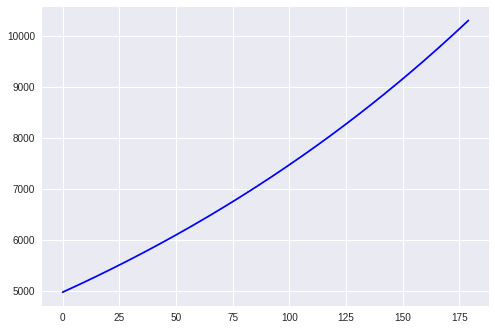

In [6]:
# Create monthly forecasts up to 15 years from now
forecast_months = 12*15

# Set your annual salary growth rate
annual_salary_growth = 0.05

# Calculate your equivalent monthly salary growth rate
monthly_salary_growth = (1+annual_salary_growth)**(1/12) - 1

# Forecast the cumulative growth of your salary
cumulative_salary_growth_forecast = np.cumprod(np.repeat(1 + monthly_salary_growth, forecast_months))

# Calculate the actual salary forecast
salary_forecast = monthly_takehome_salary * cumulative_salary_growth_forecast

# Plot the forecasted salary
plt.plot(salary_forecast, color='blue')
plt.show()

## Forecast Growing Expenses Due to Inflation

Assuming the monthly expenses will rise by an average of 2.5% per year due to **inflation**. This will lead to higher cost of living over time.

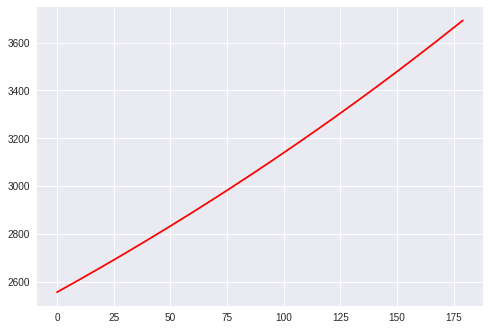

In [8]:
# Set the annual inflation rate
annual_inflation = 0.025

# Calculate the equivalent monthly inflation rate
monthly_inflation = (1+annual_inflation)**(1/12) - 1

# Forecast cumulative inflation over time
cumulative_inflation_forecast = np.cumprod(np.repeat(1 + monthly_inflation, forecast_months))

# Calculate your forecasted expenses
expenses_forecast = monthly_expenses * cumulative_inflation_forecast

# Plot the forecasted expenses
plt.plot(expenses_forecast, color='red')
plt.show()

## Net Worth

Net Worth = Assets - Liabilities = Equity



Your final net worth: 762318.83


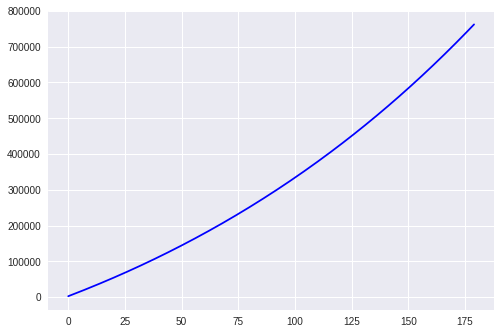

In [9]:
# Calculate your savings for each month
savings_forecast = salary_forecast - expenses_forecast

# Calculate your cumulative savings over time
cumulative_savings = np.cumsum(savings_forecast)

# Print the final cumulative savings after 15 years
final_net_worth = cumulative_savings[-1]
print("Your final net worth: " + str(round(final_net_worth, 2)))

# Plot the forecasted savings
plt.plot(cumulative_savings, color='blue')
plt.show()

###Saving a million in 15 years?

Use .pmt() function to calculate how much you need to save each month in order to accumulate your desired wealth over time.

Let's say investing in the stock market can earn 5-10% per year on your capital on average by investing in a low cost index fund.

Assuming a modest 7% return per year, which has been the average annual return in the US stock market from 1950-2009.

In [10]:
# Set the annual investment return to 7%
investment_rate_annual = 0.07

# Calculate the monthly investment return
investment_rate_monthly = (1+investment_rate_annual)**(1/12) - 1

# Calculate your required monthly investment to amass $1M
required_investment_monthly = np.pmt(rate=investment_rate_monthly, 
                                     nper=forecast_months, 
                                     pv=0, 
                                     fv=-1000000)
print("You will have to invest $" + str(round(required_investment_monthly, 2)) + " per month to amass $1M over 15 years")

You will have to invest $3214.35 per month to amass $1M over 15 years


## Investing a Percentage of Your Income

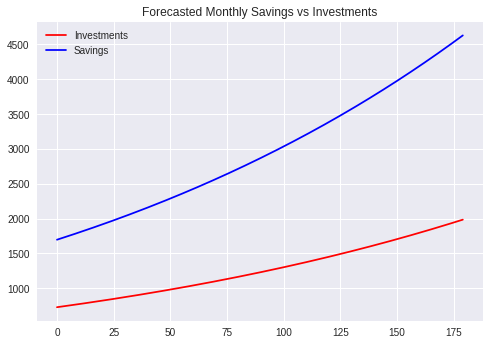

In [20]:
monthly_investment_percentage = 0.30
cash_flow_forecast = salary_forecast - expenses_forecast

# Calculate your monthly deposit into your investment account
investment_deposit_forecast = monthly_investment_percentage * cash_flow_forecast

# The rest goes into your savings account
savings_forecast_new = (1-monthly_investment_percentage) * cash_flow_forecast

# Calculate your cumulative savings over time
cumulative_savings_new = np.cumsum(savings_forecast_new)

# Plot your forecasted monthly savings vs investments
plt.plot(investment_deposit_forecast, color='red', label='Investments')
plt.plot(savings_forecast_new, color='blue', label='Savings')
plt.title('Forecasted Monthly Savings vs Investments')
plt.legend()
plt.show()

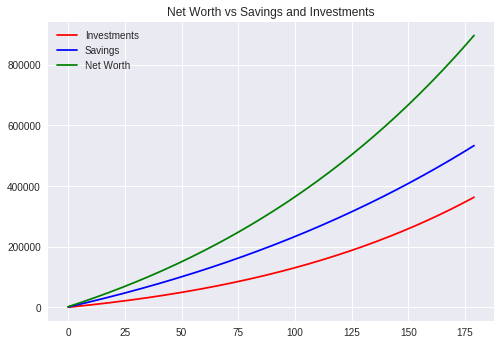

In [24]:
investment_portfolio = np.zeros(forecast_months)
net_worth = np.zeros(forecast_months)

# Loop through each forecast period
for i in range(forecast_months):
    
    # Find the previous investment deposit amount
    if i == 0: 
        previous_investment = 0
    else:
        previous_investment = investment_portfolio[i-1]
        
    # Calculate the value of your previous investments, which have grown
    previous_investment_growth = previous_investment*(1 + investment_rate_monthly)
    
    # Add your new deposit to your investment portfolio
    investment_portfolio[i] =  previous_investment_growth + investment_deposit_forecast[i]
    
    # Calculate your net worth at each point in time
    net_worth[i] = cumulative_savings_new[i] + investment_portfolio[i]
         
# Plot your forecasted cumulative savings vs investments and net worth
plt.plot(investment_portfolio, color='red', label='Investments')
plt.plot(cumulative_savings_new, color='blue', label='Savings')
plt.plot(net_worth, color='green', label='Net Worth')

plt.title('Net Worth vs Savings and Investments')
plt.legend()
plt.show()

## The Power of Time and Compound Interest

Goal: Save $1.0 million over 40 years. Assume an average 7% rate of return per year.

In [29]:
np.pmt(rate=(1+0.07)**(1/12) - 1, nper=12*40, pv=0, fv=1000000)

-404.60570652994693

What if your investments only returned 5% on average?

In [30]:
np.pmt(rate=(1+0.05)**(1/12) - 1, nper=12*40, pv=0, fv=1000000)

-674.5250658283281

Goal: Save 1 million over 25 years. Assume an average 7% rate of return per year

In [31]:
np.pmt(rate=(1+0.07)**(1/12) - 1, nper=12*25, pv=0, fv=1000000)

-1277.070900224547

In [32]:
np.pmt(rate=(1+0.05)**(1/12) - 1, nper=12*25, pv=0, fv=1000000)

-1707.2580921733218

##Inflation-Adjusted Net Worth

What if you retire 15 years from now. What is 900,000 going to be worth 15 years from now?

In [33]:
# Set your future net worth
future_net_worth = 900000

# Set the annual inflation rate to 2.5%
annual_inflation = 0.025

# Calculate the present value of your terminal wealth over 15 years
inflation_adjusted_net_worth = np.pv(rate=annual_inflation, 
                                     nper=15, 
                                     pmt=0, 
                                     fv=-1*future_net_worth)
print("Your inflation-adjusted net worth: $" + str(round(inflation_adjusted_net_worth, 2)))

Your inflation-adjusted net worth: $621419.0
